# Setup

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [3]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [4]:
file_list = glob.glob('./experiments/configs/*mscoco*.json')

configs = [json.load(open(file)) for file in file_list]

In [5]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [6]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x7f0e97bdd100>],

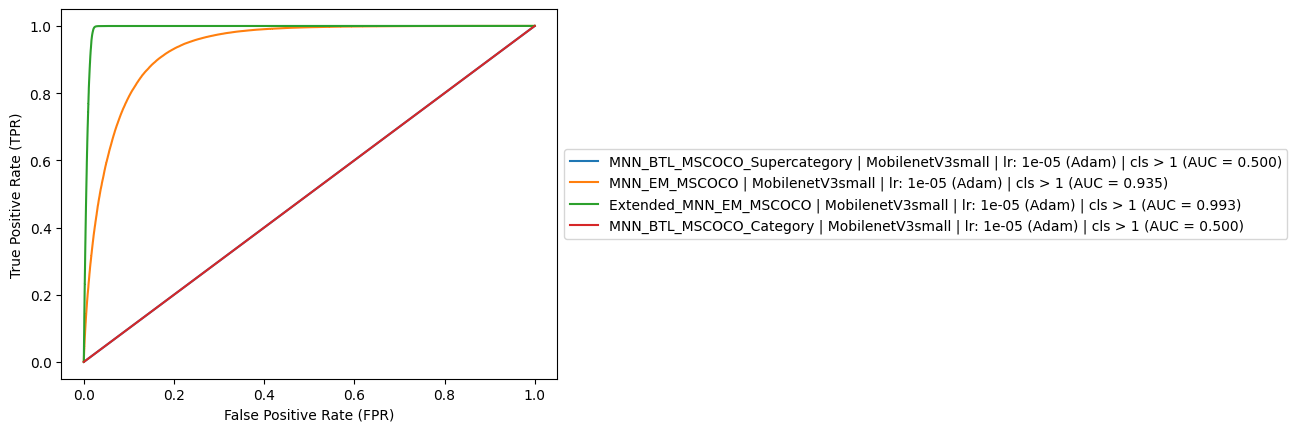

In [7]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x7f0e942e2610>],

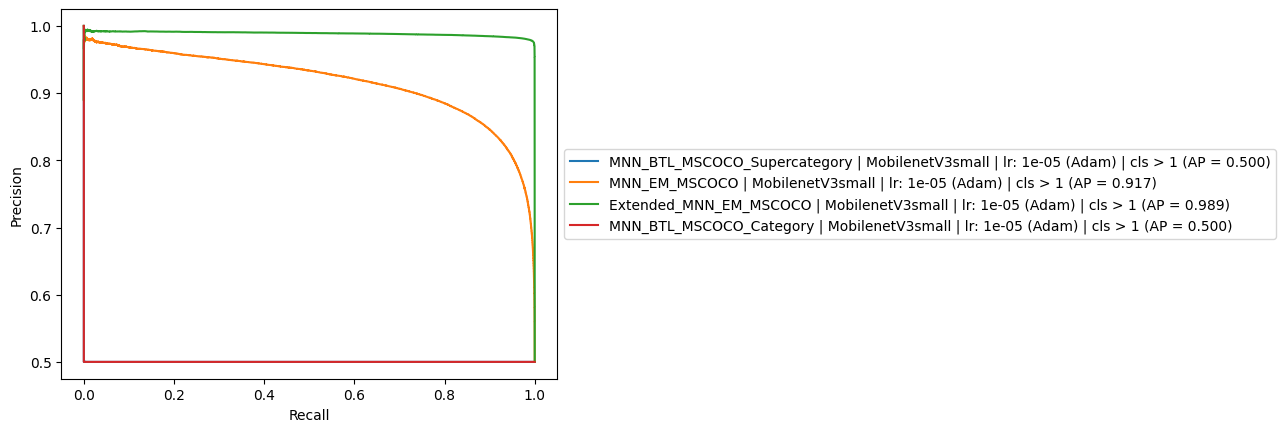

In [8]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [9]:
import pandas as pd

In [10]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])
metrics_df

2023-06-10 19:42:22.421400: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_BTL_MSCOCO_Supercategory,MobilenetV3small,Adam,0.00001,1,0.500000,0.500006,0.500000,-0.999600,0.500000,0.000010,-0.999577,0.500000,0.500000,1.000000,0.666667,-0.999674,0.500000
1,MNN_EM_MSCOCO,MobilenetV3small,Adam,0.00001,1,0.934723,0.917392,0.867443,0.338126,0.867997,0.736255,0.312544,0.868125,0.830424,0.923377,0.874437,0.238798,0.867407
2,Extended_MNN_EM_MSCOCO,MobilenetV3small,Adam,0.00001,1,0.993439,0.988701,0.986279,0.877483,0.986331,0.972668,0.877483,0.986331,0.976383,0.996778,0.986475,0.877347,0.986331
3,MNN_BTL_MSCOCO_Category,MobilenetV3small,Adam,0.00001,1,0.500000,0.500006,0.500000,-0.999594,0.500000,0.000000,0.000544,0.500000,0.500000,1.000000,0.666667,-0.999689,0.500000
